# Simulation

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import scvi

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import scp.simulations as sm
import scp.plots as pl
from scp.models import PROTVI

scvi.settings.seed = 0
sm.fix_seed(0)

## Generation

In [2]:
n_datasets = 10

datasets = []
for i in range(n_datasets):
    adata = sm.simulate_two_groups(n_de_proteins=1)
    datasets.append(adata)

## Inspection

Let's look at one of the simulated datasets.

In [3]:
adata = datasets[0]

print(f"Number of cells: {adata.n_obs}")
print(f"Number of proteins: {adata.n_vars}")

mask = adata.layers["detected"]
n_obs = np.mean(mask)

print(f"Observed intensities: {n_obs*100:.2f}%")

Number of cells: 1000
Number of proteins: 900
Observed intensities: 61.96%


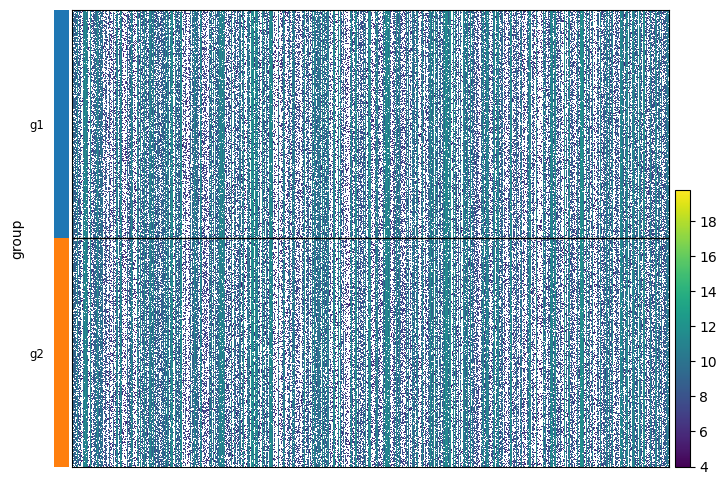

In [4]:
adata.X = adata.layers["intensity"].copy()
adata.X[adata.layers["detected"] == 0] = np.nan

sc.pl.heatmap(adata, var_names=adata.var_names, groupby="group", show_gene_labels=False)

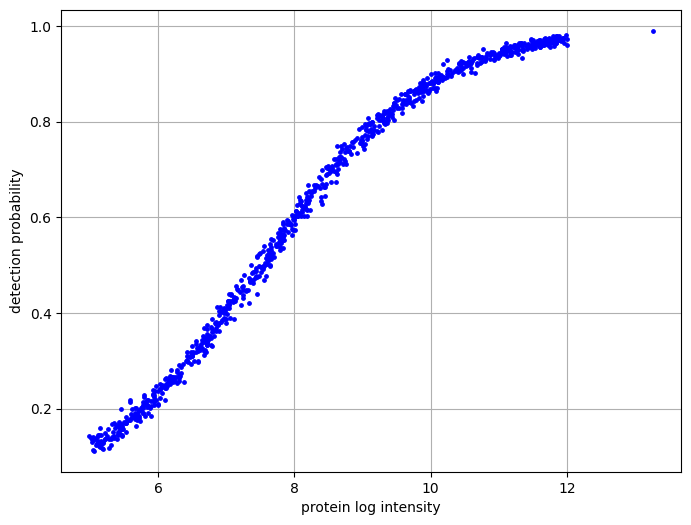

In [5]:
x = adata.layers["intensity"].copy()
x[adata.layers["detected"] == 0] = np.nan

pl.scatter_protein_detection_probability_and_intensity(x)

## Modelling

Let's fit a few models to the data.

### PROTVI

In [6]:
adata = datasets[0]

In [7]:
adata.X = adata.layers["intensity"] * adata.layers["detected"]

In [8]:
PROTVI.setup_anndata(adata)

model = PROTVI(adata, log_variational=False)
#model.view_anndata_setup()

In [9]:
model.train(max_epochs=1000)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1000/1000: 100%|██████████| 1000/1000 [02:46<00:00,  4.09it/s, v_num=1, train_loss_step=726, train_loss_epoch=592]      

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 1000/1000: 100%|██████████| 1000/1000 [02:46<00:00,  6.01it/s, v_num=1, train_loss_step=726, train_loss_epoch=592]


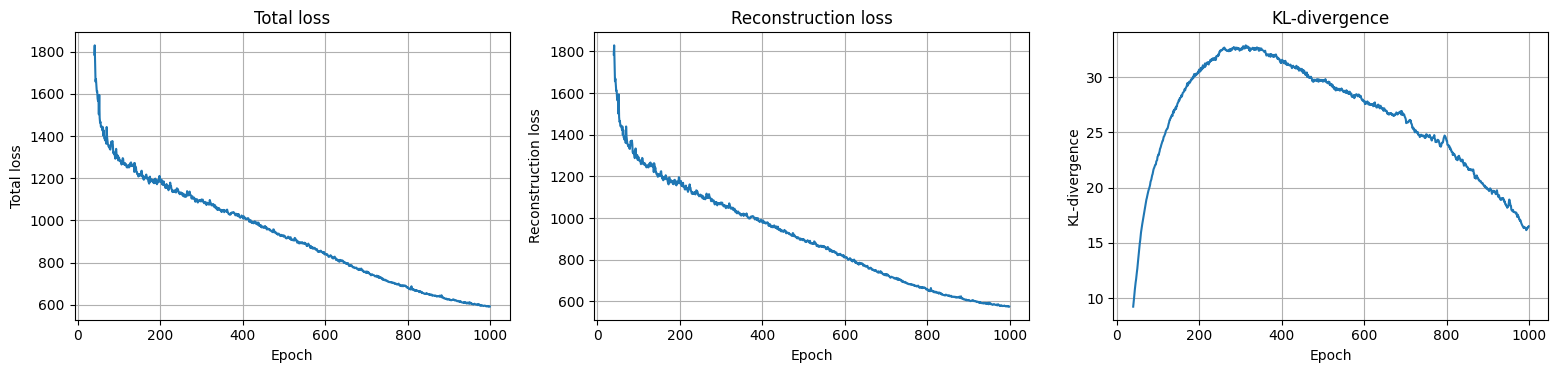

In [10]:
pl.plot_loss(model.history, n_skip=40)

In [11]:
x_est, p_est = model.impute(adata)

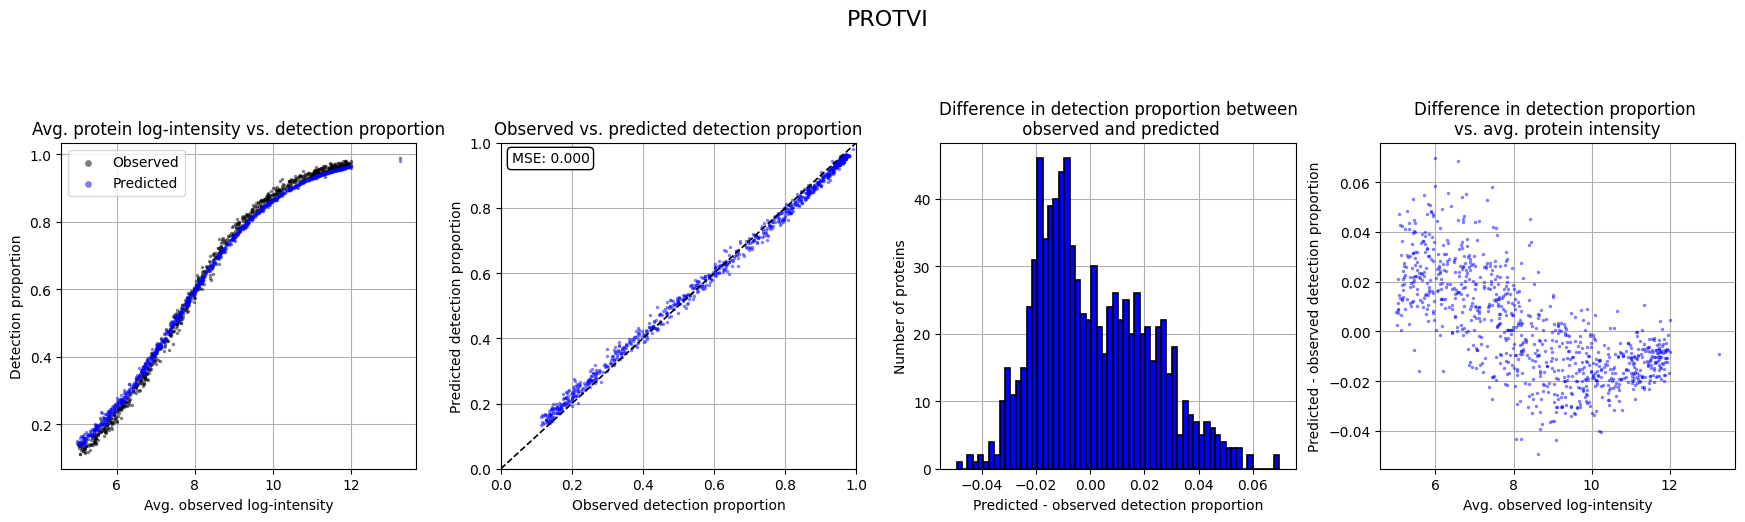

In [12]:
x_data = adata.layers["intensity"].copy()
x_data[~adata.layers["detected"]] = np.nan

pl.plot_protein_detection_probability_panel(x_data, p_est)

### protDP

In [13]:
# @TODO

### Other impuation methods

In [14]:
# @TODO